<a href="https://colab.research.google.com/github/hasanalpay/machine-learning/blob/main/Airline_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [159]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt

In [160]:
df=pd.read_csv('air.csv')
df.head(3)

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,100 Darter (S.L. Industries),Piston,145,104.0,91.0,46.0,36.0,450,900.0,1300.0,"2,050","1,180",25/3,37/5,370,1300000.0
1,7 CCM Champ,Piston,85,89.0,83.0,44.0,15.0,600,720.0,800.0,"1,350",820,20/7,36/1,190,1230000.0
2,100 Darter (S.L. Industries),Piston,90,90.0,78.0,37.0,19.0,650,475.0,850.0,"1,300",810,21/5,35/0,210,1600000.0


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model Name               503 non-null    object 
 1   Engine Type              503 non-null    object 
 2   HP or lbs thr ea engine  503 non-null    object 
 3   Max speed Knots          484 non-null    float64
 4   Rcmnd cruise Knots       493 non-null    float64
 5   Stall Knots dirty        490 non-null    float64
 6   Fuel gal/lbs             503 non-null    float64
 7   All eng rate of climb    499 non-null    object 
 8   Eng out rate of climb    479 non-null    float64
 9   Takeoff over 50ft        479 non-null    float64
 10  Landing over 50ft        503 non-null    object 
 11  Empty weight lbs         503 non-null    object 
 12  Length ft/in             503 non-null    object 
 13  Wing span ft/in          503 non-null    object 
 14  Range N.M.               4

In [162]:
df=df.dropna()
y=df["Price"]



In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 415 entries, 0 to 516
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model Name               415 non-null    object 
 1   Engine Type              415 non-null    object 
 2   HP or lbs thr ea engine  415 non-null    object 
 3   Max speed Knots          415 non-null    float64
 4   Rcmnd cruise Knots       415 non-null    float64
 5   Stall Knots dirty        415 non-null    float64
 6   Fuel gal/lbs             415 non-null    float64
 7   All eng rate of climb    415 non-null    object 
 8   Eng out rate of climb    415 non-null    float64
 9   Takeoff over 50ft        415 non-null    float64
 10  Landing over 50ft        415 non-null    object 
 11  Empty weight lbs         415 non-null    object 
 12  Length ft/in             415 non-null    object 
 13  Wing span ft/in          415 non-null    object 
 14  Range N.M.               415 no

In [164]:
df['HP or lbs thr ea engine'] = df['HP or lbs thr ea engine'].str.replace(',', '').astype('float64')
df['Max speed Knots'] = df['Max speed Knots'].astype('float64')

In [165]:
df['All eng rate of climb'] = df['All eng rate of climb'].str.replace(',', '').astype('float64')

In [166]:
df['Landing over 50ft'] = df['Landing over 50ft'].str.replace(',', '').astype('float64')

In [167]:
df['Empty weight lbs'] = df['Empty weight lbs'].str.replace(',', '').astype('float64')

In [168]:
df['Length ft/in'] = df['Length ft/in'].str.replace(',', '')  # Virgülleri kaldır
def safe_eval(value):
    try:
        if '/' in value:
            num, den = map(float, value.split('/'))  # Kesirleri ayır
            return num / den if den != 0 else None  # 0'a bölme hatasını önle
        return float(value)  # Normal sayıları çevir
    except:
        return None  # Geçersiz verileri NaN yap

df['Length ft/in'] = df['Length ft/in'].apply(safe_eval)  # Fonksiyonu uygula


In [169]:
df['Wing span ft/in'] = df['Wing span ft/in'].str.replace(',', '')  # Virgülleri kaldır
def safe_eval(value):
    try:
        if '/' in value:
            num, den = map(float, value.split('/'))  # Kesirleri ayır
            return num / den if den != 0 else None  # 0'a bölme hatasını önle
        return float(value)  # Normal sayıları çevir
    except:
        return None  # Geçersiz verileri NaN yap

df['Wing span ft/in'] = df['Wing span ft/in'].apply(safe_eval)  # Fonksiyonu uygula


In [170]:
df['Range N.M.'] = df['Range N.M.'].str.replace(',', '').astype('float64')

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 415 entries, 0 to 516
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model Name               415 non-null    object 
 1   Engine Type              415 non-null    object 
 2   HP or lbs thr ea engine  415 non-null    float64
 3   Max speed Knots          415 non-null    float64
 4   Rcmnd cruise Knots       415 non-null    float64
 5   Stall Knots dirty        415 non-null    float64
 6   Fuel gal/lbs             415 non-null    float64
 7   All eng rate of climb    415 non-null    float64
 8   Eng out rate of climb    415 non-null    float64
 9   Takeoff over 50ft        415 non-null    float64
 10  Landing over 50ft        415 non-null    float64
 11  Empty weight lbs         415 non-null    float64
 12  Length ft/in             376 non-null    float64
 13  Wing span ft/in          360 non-null    float64
 14  Range N.M.               415 no

In [172]:
c=df
x=df
a=c.drop(["Model Name","Engine Type","Price"],axis=1)

In [173]:

ss=StandardScaler()
x2=ss.fit_transform(a)
x2 = pd.DataFrame(x2, columns=a.columns)# burada bir hata var

In [174]:

x2.drop(columns=["Length ft/in", "Wing span ft/in"], inplace=True)

x2=pd.get_dummies(x,columns=['Model Name',"Engine Type"],drop_first=True)

In [175]:

# x2.drop(columns=["Length ft/in"])
# x2.drop(columns=["Wing span ft/in"])

In [176]:
x2 = x2.reset_index(drop=True)
y = y.reset_index(drop=True)

from sklearn import tree
clf = tree.DecisionTreeRegressor(max_depth=3)
model = clf.fit(x2, y)

In [177]:
model.score(x2,y)

0.9808099751738869

In [178]:
# Score cok yüksek çıktı modelimiz aşırı öğrenmesini engelemek içint train_test_split kulanacaz

In [179]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=0.2,random_state=42)

In [180]:
clff = tree.DecisionTreeRegressor(max_depth=3)
modell = clff.fit(x_train, y_train)
modell.score(x_test,y_test)



0.973610215098606

In [181]:
y_pred=modell.predict(x_test)

In [182]:
x_test.shape

(83, 242)

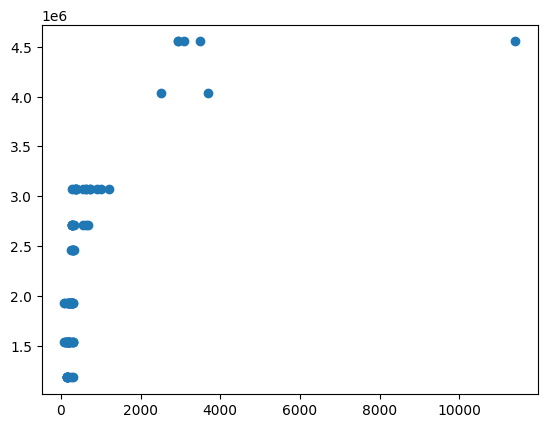

In [186]:
plt.scatter(x_test['HP or lbs thr ea engine'],y_pred)

plt.show()

In [184]:
y_pred


array([2714250.        , 4552916.66666667, 2714250.        ,
       3075783.33333333, 3075783.33333333, 1180761.9047619 ,
       3075783.33333333, 3075783.33333333, 1925724.21052632,
       4033333.33333333, 1541488.4057971 , 4552916.66666667,
       1541488.4057971 , 1925724.21052632, 3075783.33333333,
       2456818.18181818, 1925724.21052632, 1541488.4057971 ,
       2714250.        , 4552916.66666667, 1180761.9047619 ,
       3075783.33333333, 2456818.18181818, 1541488.4057971 ,
       2456818.18181818, 1925724.21052632, 1541488.4057971 ,
       1925724.21052632, 3075783.33333333, 2456818.18181818,
       1541488.4057971 , 1180761.9047619 , 3075783.33333333,
       2456818.18181818, 1925724.21052632, 1541488.4057971 ,
       1541488.4057971 , 1180761.9047619 , 1925724.21052632,
       2714250.        , 1925724.21052632, 1180761.9047619 ,
       1541488.4057971 , 1180761.9047619 , 1925724.21052632,
       1925724.21052632, 1541488.4057971 , 2456818.18181818,
       1925724.21052632,